In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Our implementation here
from utils.np import *

### Experiments
This part is numerically unstable, which give unsatisfactory results, since epsilon can not be small

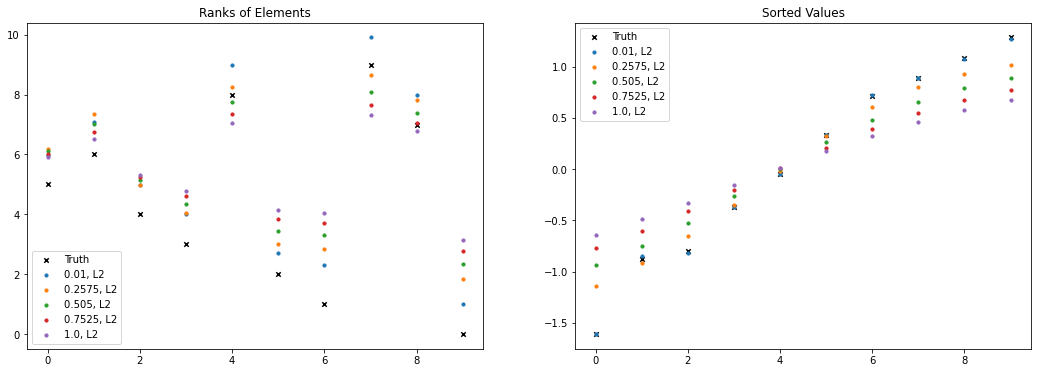

In [2]:
x_size = 10
y_size = 10

x = np.random.randn(10)
y = np.linspace(0, 1, 10)

a = np.ones(x_size)/x_size
b = np.ones(y_size)/y_size

args = np.argsort(x)
ranks = args.argsort()

s_ticks = np.arange(0, len(x))
r_ticks = np.arange(0, len(x))


plt.figure(figsize=(18, 6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)


ax1.scatter(r_ticks, ranks, 20, marker="x", c="black", label="Truth")

ax2.scatter(s_ticks, x[args], 20, marker="x", c="black", label="Truth")
    
for eps in np.linspace(0.01, 1, 5):
    R, S = Rank_Sort(a, b, x, y, eps)
    
    ax1.scatter(r_ticks, R, 10, label=str(eps)+", L2")
    ax2.scatter(s_ticks, S, 10, label=str(eps)+", L2")

ax1.legend()
ax1.set_title("Ranks of Elements")

ax2.legend()
ax2.set_title("Sorted Values")

plt.show()

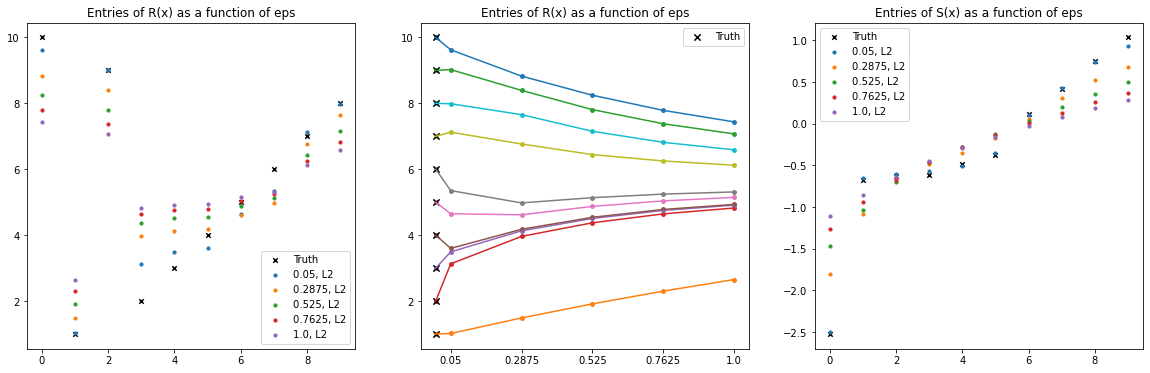

In [41]:
x_size = 10
y_size = 10

eps = 0.5
power = 2

x = np.random.randn(10)
y = np.linspace(0, 1, 10)

a = np.ones(x_size)/x_size
b = np.ones(y_size)/y_size

args = np.argsort(x)
ranks = args.argsort() + 1
R_matrix = ranks[:, None]

s_ticks = np.arange(0, len(x))
r_ticks = np.arange(0, len(x))

plt.figure(figsize=(20, 6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.scatter(r_ticks, ranks, 20, marker="x", c="black", label="Truth")
ax3.scatter(s_ticks, x[args], 20, marker="x", c="black", label="Truth")

eps_ticks = np.linspace(0.05, 1, 5)
for i, eps in enumerate(eps_ticks):
    R, S = Rank_Sort(a, b, x, y, eps)
    R_matrix = np.concatenate((R_matrix, R[:, None]), axis=1)
    
    ax1.scatter(r_ticks, R, 10, label=str(eps)+", L2")
    
    ax3.scatter(s_ticks, S, 10, label=str(eps)+", L2")

for i in range(x_size):
    ax2.scatter(np.concatenate((np.array([0]), eps_ticks)), R_matrix[i, :], 15)
    ax2.plot(np.concatenate((np.array([0]), eps_ticks)), R_matrix[i, :])

ax2.scatter(np.zeros_like(ranks), ranks, 40, marker="x", c="black", label="Truth")

ax1.set_title("Entries of R(x) as a function of eps")
ax1.legend()

ax2.set_xticks(eps_ticks)
ax2.set_xticklabels(eps_ticks)
ax2.set_title("Entries of R(x) as a function of eps")
ax2.legend()

ax3.set_title("Entries of S(x) as a function of eps")
ax3.legend()

plt.show()

## Experiment using stable version

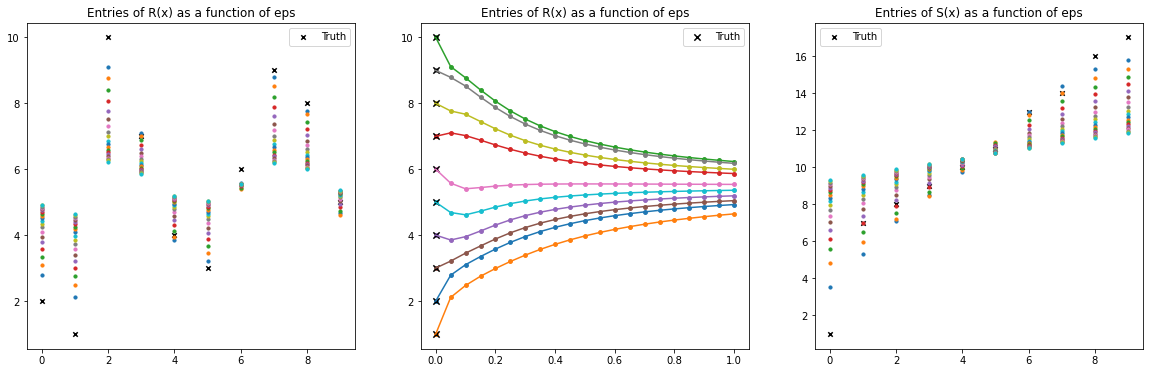

In [39]:
x_size = 10
y_size = 10

eps = 0.5
power = 2

x = np.random.choice(range(20), 10, replace=False)
y = np.linspace(0, 1, 10)

a = np.ones(x_size)/x_size
b = np.ones(y_size)/y_size

args = np.argsort(x)
ranks = args.argsort() + 1
R_matrix = ranks[:, None]

s_ticks = np.arange(0, len(x))
r_ticks = np.arange(0, len(x))

plt.figure(figsize=(20, 6))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.scatter(r_ticks, ranks, 20, marker="x", c="black", label="Truth")
ax3.scatter(s_ticks, x[args], 20, marker="x", c="black", label="Truth")

eps_ticks = np.linspace(5e-2, 1, 20)
for i, eps in enumerate(eps_ticks):
    R, S = Rank_Sort_log(a, b, x, y, eps, g=squash)
    R_matrix = np.concatenate((R_matrix, R[:, None]), axis=1)
    
    ax1.scatter(r_ticks, R, 10)
    
    ax3.scatter(s_ticks, S, 10)

for i in range(x_size):
    ax2.scatter(np.concatenate((np.array([0]), eps_ticks)), R_matrix[i, :], 15)
    ax2.plot(np.concatenate((np.array([0]), eps_ticks)), R_matrix[i, :])

ax2.scatter(np.zeros_like(ranks), ranks, 40, marker="x", c="black", label="Truth")

ax1.set_title("Entries of R(x) as a function of eps")
ax1.legend()

ax2.set_title("Entries of R(x) as a function of eps")
ax2.legend()

ax3.set_title("Entries of S(x) as a function of eps")
ax3.legend()

plt.show()